In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dat = pd.read_csv(r'../MSBA/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [36]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [239]:
dat.shape

(7043, 22)

In [22]:
#Check value of each columns ==> StreamingMovies & InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV
#Total charge 11 is blank
for i in dat.columns:
    print(dat[i].value_counts(dropna=False))


2676-OXPPQ    1
0931-MHTEM    1
6961-VCPMC    1
5876-HZVZM    1
3214-IYUUQ    1
0301-KOBTQ    1
8022-BECSI    1
8654-DHAOW    1
6486-LHTMA    1
5288-AHOUP    1
1428-GTBJJ    1
4806-KEXQR    1
5647-URDKA    1
5469-CTCWN    1
3012-VFFMN    1
6848-HJTXY    1
4464-JCOLN    1
8519-QJGJD    1
1724-IQWNM    1
1077-HUUJM    1
8999-BOHSE    1
6877-TJMBR    1
1635-FJFCC    1
3451-VAWLI    1
3935-TBRZZ    1
9152-AMKAK    1
7601-GNDYK    1
6713-OKOMC    1
2276-YDAVZ    1
0254-FNMCI    1
             ..
2087-QAREY    1
9167-APMXZ    1
5057-RKGLH    1
2898-MRKPI    1
0220-EBGCE    1
8245-UMPYT    1
5049-GLYVG    1
4190-MFLUW    1
9921-QFQUL    1
6040-CGACY    1
1925-LFCZZ    1
1439-LCGVL    1
2882-WDTBA    1
2599-CZABP    1
6656-GULJQ    1
9158-VCTQB    1
0376-OIWME    1
1043-YCUTE    1
8208-EUMTE    1
5832-TRLPB    1
8628-MFKAX    1
6572-ADKRS    1
6508-NJYRO    1
1951-IEYXM    1
3658-KIBGF    1
8268-YDIXR    1
3761-FLYZI    1
3737-XBQDD    1
4060-LDNLU    1
0533-UCAAU    1
Name: customerID, Length

In [159]:
# Replace No internet service to No
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    dat[i]  = dat[i].replace({'No internet service' : 'No'})

In [25]:
#replace Blanks in TotalCharges by median
median = dat['TotalCharges'][dat['TotalCharges'] !=" "].median()
print(median)
dat['TotalCharges']=dat['TotalCharges'].replace(" ",median)

1398.25


In [34]:
#TotalCharges to numeric
dat['TotalCharges']=pd.to_numeric(dat['TotalCharges'])

In [59]:
#SeniorCitizen to object
dat['SeniorCitizen']=dat['SeniorCitizen'].astype('category')

In [38]:
dat.pivot_table(index = 'gender',values='TotalCharges',aggfunc=np.sum)

,TotalCharges
gender,
Female,7975526.35
Male,8118925.70


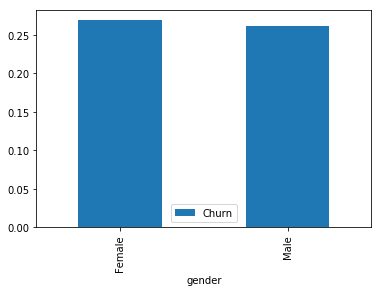

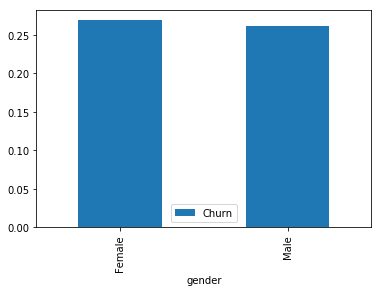

In [127]:
dat.groupby('gender').agg({'Churn': lambda x: sum(x=='Yes')/len(x)}).reset_index().plot.bar(x='gender',y='Churn')
plt.show()

In [110]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = dat.nunique()[dat.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in dat.columns if x not in cat_cols + target_col + Id_col]

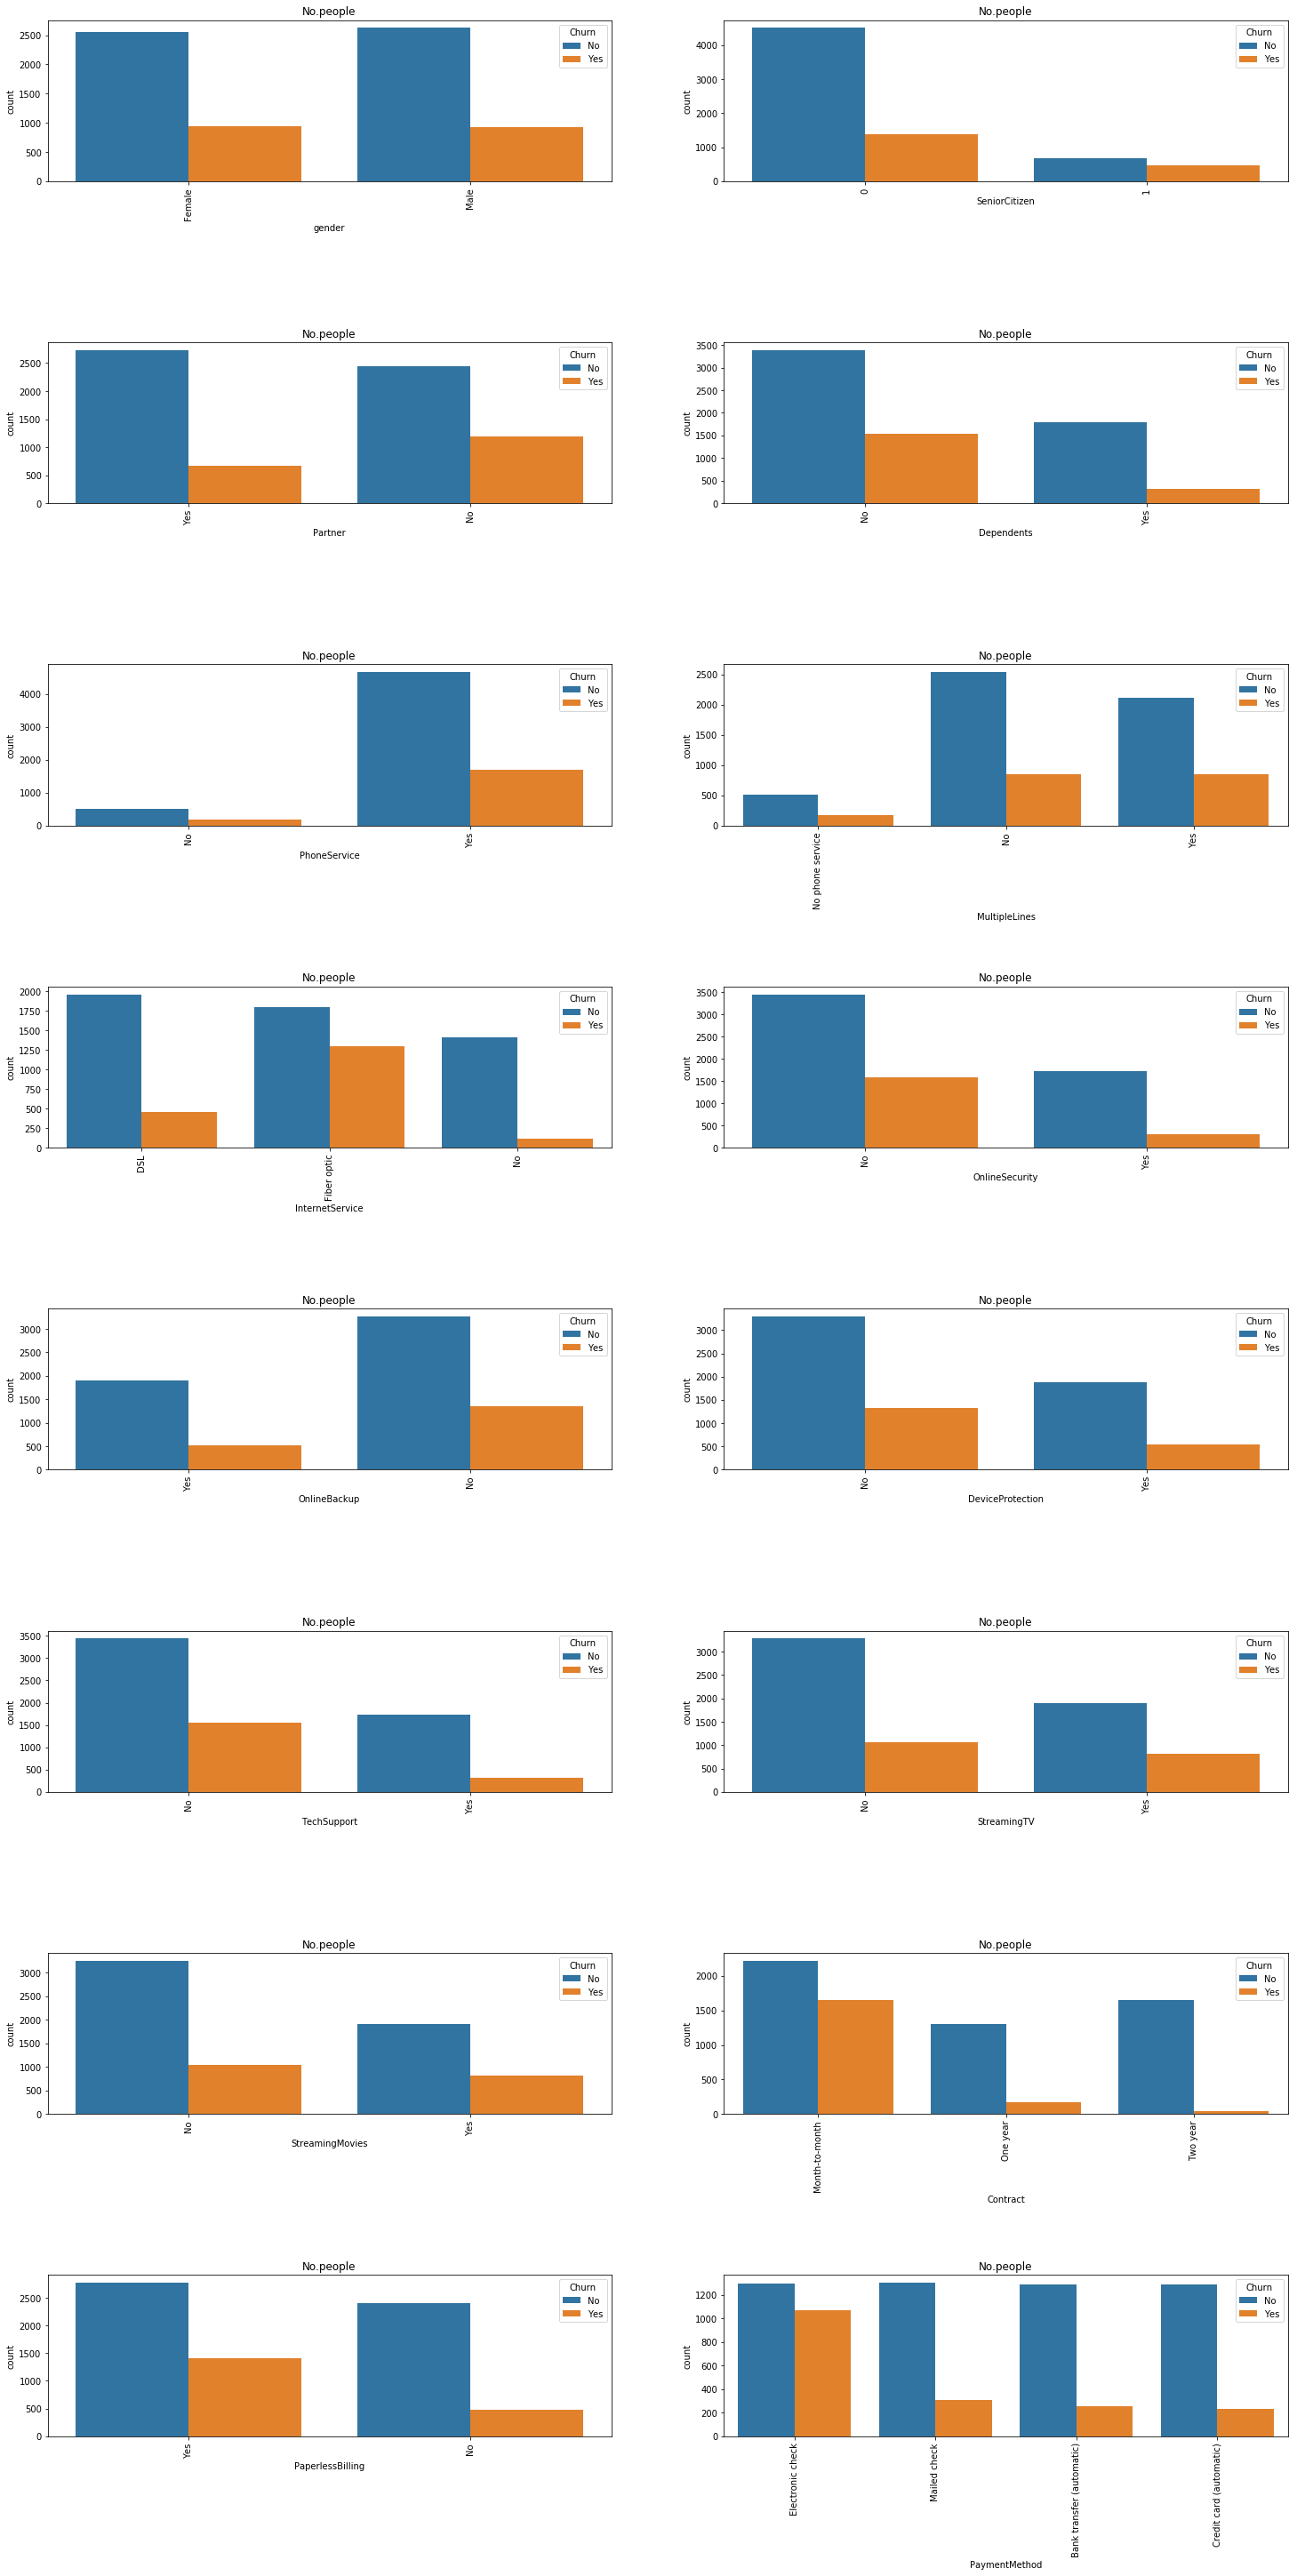

In [160]:
fig=plt.subplots(figsize=(25,50))
for i, j in enumerate(cat_cols):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = dat, hue='Churn')
    plt.xticks(rotation=90)
    plt.title("No.people")
plt.show()

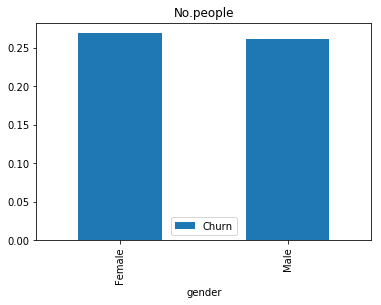

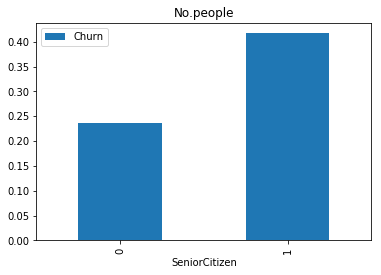

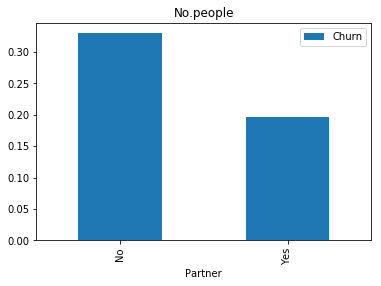

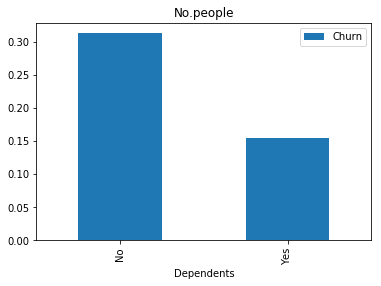

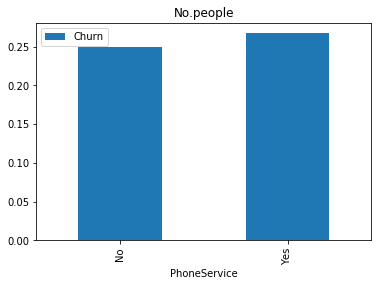

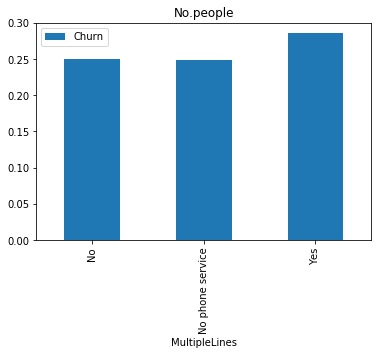

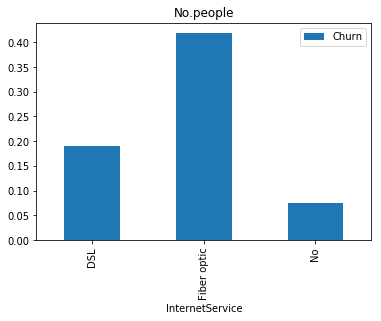

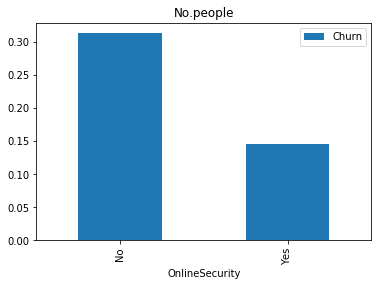

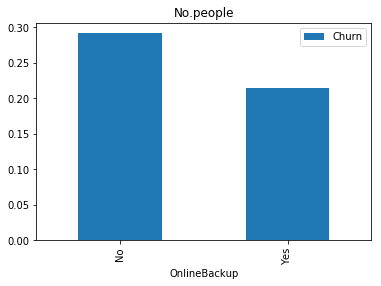

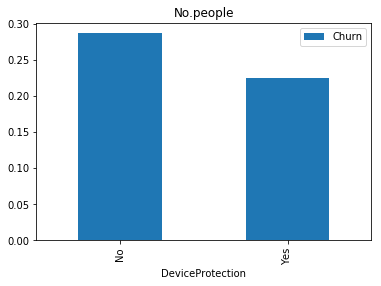

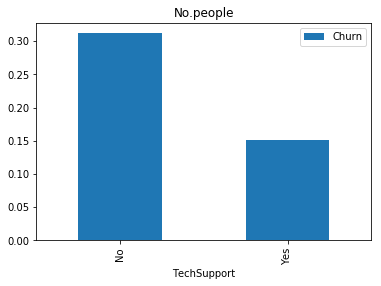

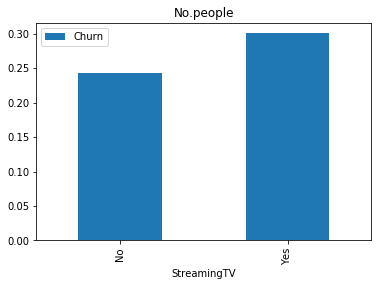

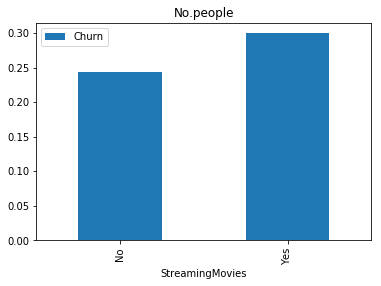

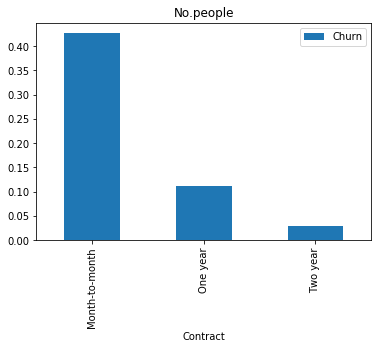

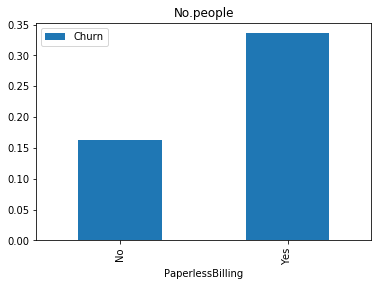

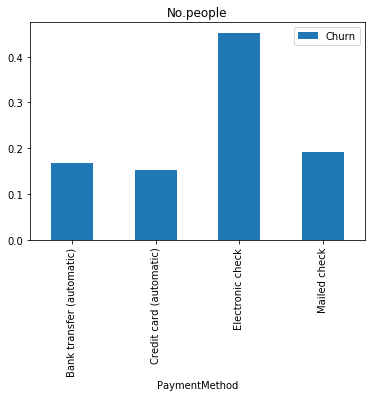

In [166]:
#fig=plt.subplots(figsize=(25,50))
for i, j in enumerate(cat_cols):
    dat.groupby(j).agg({'Churn': lambda x: sum(x=='Yes')/len(x)}).reset_index().plot.bar(x=j,y='Churn')
    plt.xticks(rotation=90)
    plt.title("No.people")
    plt.show()

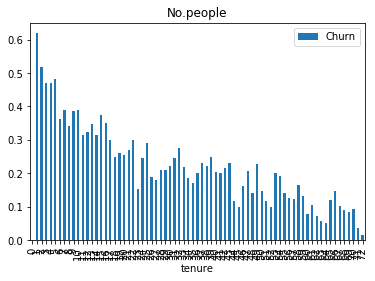

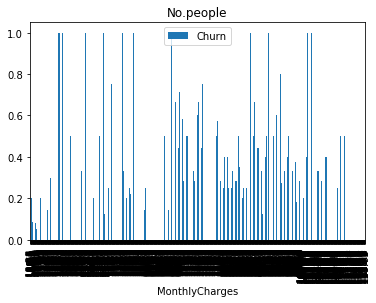

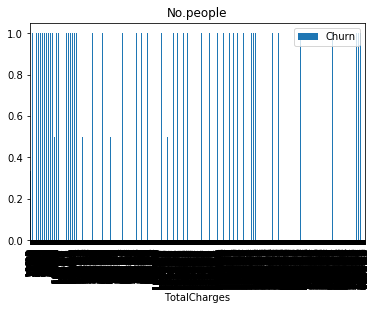

In [167]:
for i, j in enumerate(num_cols):
    dat.groupby(j).agg({'Churn': lambda x: sum(x=='Yes')/len(x)}).reset_index().plot.bar(x=j,y='Churn')
    plt.xticks(rotation=90)
    plt.title("No.people")
    plt.show()

In [217]:
# Bin Tenure 
def tenure_bin(dat):
    if dat.tenure < 12:
        return 'Tenure 0-12'
    elif (dat.tenure >= 12) & (dat.tenure < 24):
        return 'Tenure 12-24'
    elif (dat.tenure >= 24) & (dat.tenure < 48):
        return 'Tenure 24-48'
    elif (dat.tenure >= 48) & (dat.tenure < 60):
        return 'Tenure 48-60'
    elif (dat.tenure > 60):
        return 'Tenure > 60'
    
dat['tenure_group'] = dat.apply(lambda dat:tenure_bin(dat), axis=1)   
dat['tenure_group'].value_counts()

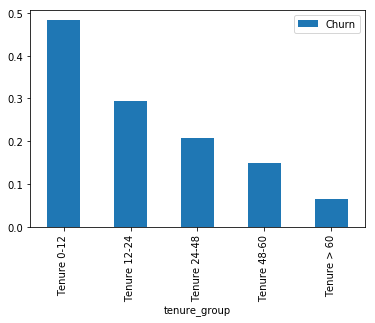

In [226]:
# Tenue_group vs churn rate
dat.groupby('tenure_group').agg({'Churn': lambda x: sum(x=='Yes')/len(x)}).reset_index().plot.bar(x='tenure_group',y='Churn')
plt.show()

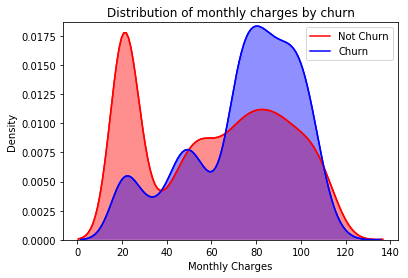

In [235]:
ax = sns.kdeplot(dat.MonthlyCharges[(dat["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dat.MonthlyCharges[(dat["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

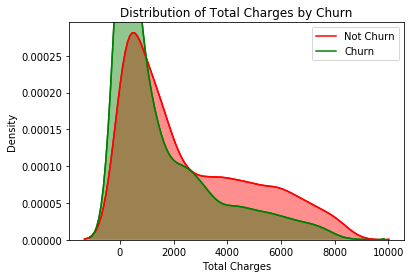

In [237]:
t_charge = sns.kdeplot(dat.TotalCharges[dat['Churn'] == 'No'],
                      color = 'Red', shade = True)
t_charge = sns.kdeplot(dat.TotalCharges[dat['Churn'] == 'Yes'],
                      color = 'Green', shade = True)
t_charge.legend(["Not Churn","Churn"],loc='upper right')
t_charge.set_xlabel('Total Charges')
t_charge.set_ylabel('Density')
t_charge.set_title('Distribution of Total Charges by Churn')
plt.show()

In [ ]:
#Conclusion:
# - Churn Rate decreases by Tenure
# - Higher monthly charge -> higher churn rate
# - In payment method, electronic check has higher churn rate
# - In Contract, Month-to-month has higher churn rate
# - In Internet Service, higher churn rate in FiberOptic
# - Senior people has higher churn rate

In [242]:
#Correlation matrix
corr = dat.iloc[:,2:22].corr()

In [243]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

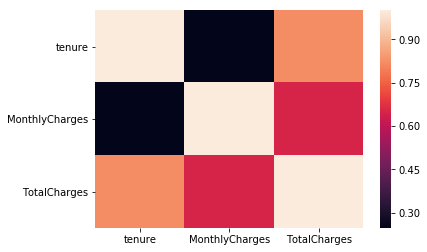

In [244]:
plt.show()